In [1]:
from PokemonSet import PokemonSet
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np

# Part A: Use default features to train the decision tree:

In [2]:
df = pd.read_csv("pokemon.csv") 
ps = PokemonSet(data = df)
ps.clean_data()
ps.data.head()

,base_egg_steps,base_happiness,base_total,sp_attack,is_legendary
0,5120.0,70.0,318.0,65.0,0.0
1,5120.0,70.0,405.0,80.0,0.0
2,5120.0,70.0,625.0,122.0,0.0
3,5120.0,70.0,309.0,60.0,0.0
4,5120.0,70.0,405.0,80.0,0.0


## Show correlation matrix for the features
We see a relative strong correlation between the four default features and whether the pokemon is legendary

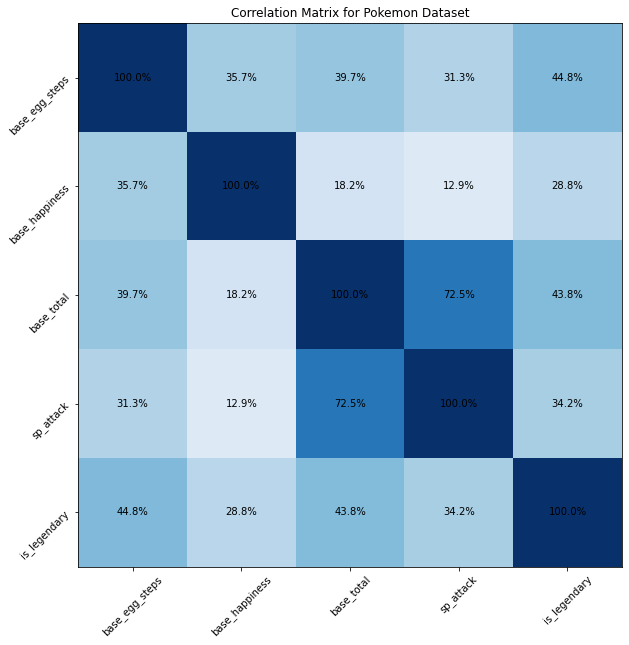

In [3]:
cc = ps.corr(absolute=True, plot=True, values=True, clim=[0,1])

## Train the tree
We use four-fold cross validation score to determine the optimal tree depth

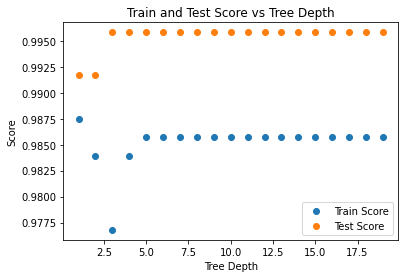

Using depth 3
Cross Validation Score on training data : 0.9767857142857144
Cross Validation Score on testing data : 0.9958333333333333


In [4]:
model = ps.make_decision_tree_model(depth=None, random_state = 114)

### $\uparrow$ We see the best test score occurs at `depth = 3`. We don't see overfitting in this decision tree model.

## Plot the tree

In [5]:
def plot_tree(model, ps, figsize = (20,20), **kwargs):
    '''
        Visualize the tree model
    Args:
        model (tree.DecisionTreeClassifier): the decision tree model we want to visualize
        ps (PokemonSet): the pokemonset that contains the data
    Kwargs:
        figsize: defaule = (20,20). The figure size
        **kwargs: Keyword arguments for tree plot
    Returns:
        None
    '''
    _, ax = plt.subplots(figsize=figsize)
    tree.plot_tree(model, ax=ax, feature_names = ps.feature, **kwargs)
    plt.show()

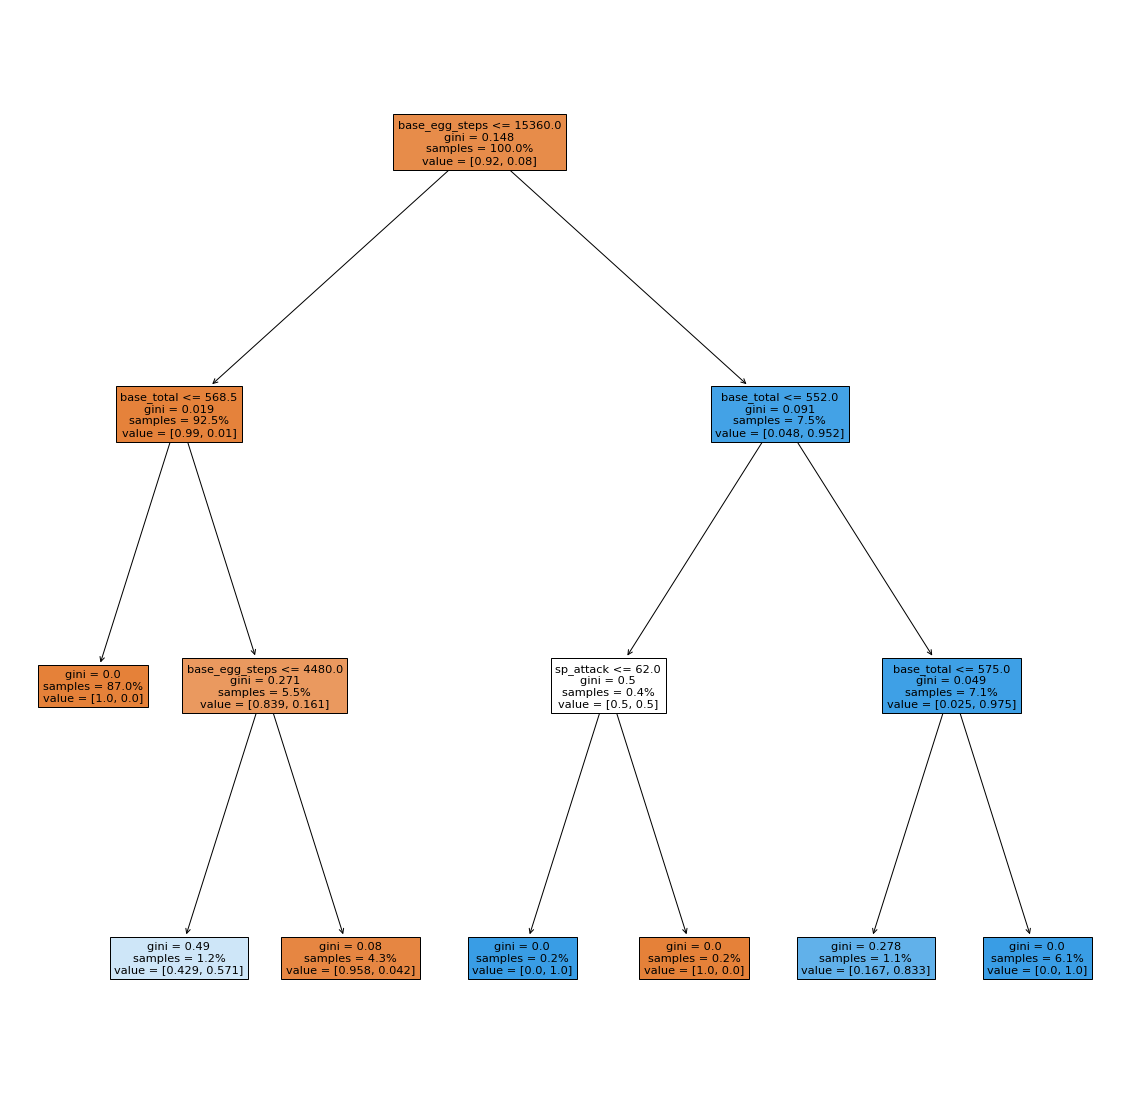

In [6]:
plot_tree(model, ps, proportion=True, filled=True)

# Part B: Choose 10 random features to train the model

In [7]:
df = pd.read_csv("pokemon.csv") 

np.random.seed(1919)
all_features = list(df.columns)
all_features.remove("is_legendary")
randomly_choosed_features = np.random.choice(all_features,10, replace=False)
print(randomly_choosed_features)

ps = PokemonSet(data = df, feature = randomly_choosed_features)
ps.clean_data()

['against_bug' 'base_happiness' 'classfication' 'against_poison' 'defense'
 'against_dragon' 'type1' 'against_psychic' 'percentage_male'
 'against_steel']


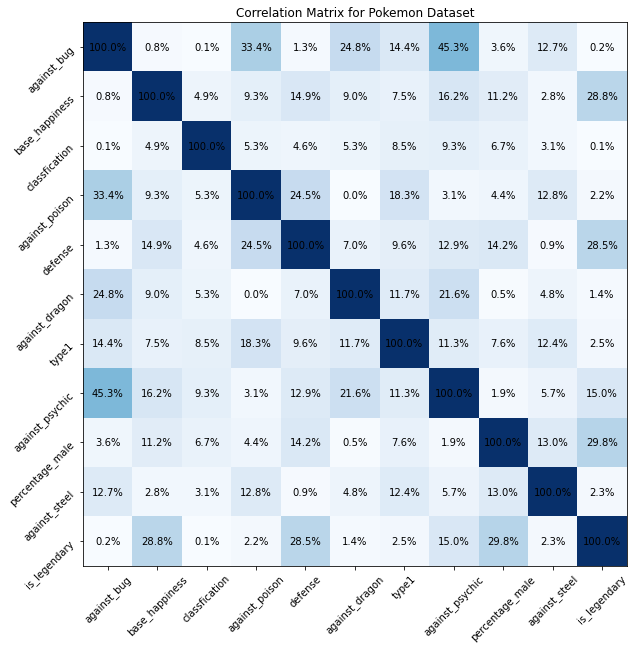

In [8]:
cc = ps.corr(absolute=True, plot=True, values=True, clim=[0,1])

### $\uparrow$ For these randomly choiced features, a few have stronger correlation with `is_legendary`, while most have weak correlation

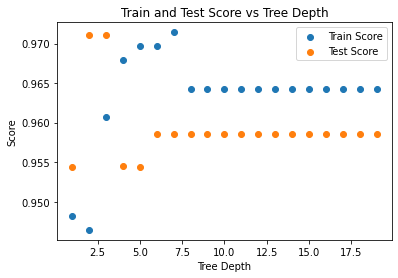

Using depth 2
Cross Validation Score on training data : 0.9464285714285714
Cross Validation Score on testing data : 0.9711065573770492


In [9]:
model = ps.make_decision_tree_model(depth=None, random_state = 810)

### $\uparrow$ In this choice of features, we see that an overfitting occurs for `depth >= 4`,  and best test scoring occurs at `depth = 2` or `3`. 

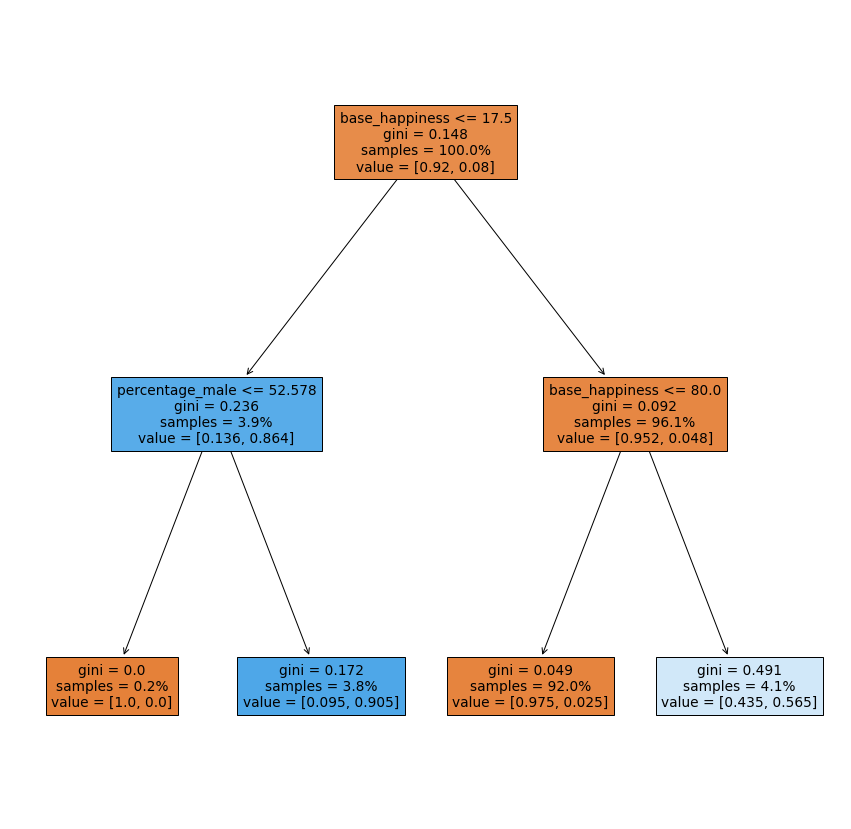

In [10]:
plot_tree(model, ps, proportion=True, filled=True, figsize=(15,15))

Do we need these?  $\downarrow$

In [11]:
# X_train, X_test, y_train, y_test = ps.split()
# print("Predictions: ")
# print(model.predict(X_train.iloc[0:10]))
# print("Actual: ")
# print(y_train.iloc[0:10])

# print(ps.data.iloc[0])
# print(X_train.shape)

In [12]:
# print(model.predict([list(X_train.iloc[0])]))
# print(X_train.iloc[0])
# print([list(X_train.iloc[0])])